# 解微分方程

## 积分求解

### 简单的例子

$$\frac{dy}{dt} = sin(t)$$

In [10]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [11]:
def dy_dt(y, t):
    return np.sin(t)

In [12]:
from scipy.integrate import odeint
t = np.linspace(0, 2*np.pi, 100)
result = odeint(dy_dt, 0, t)

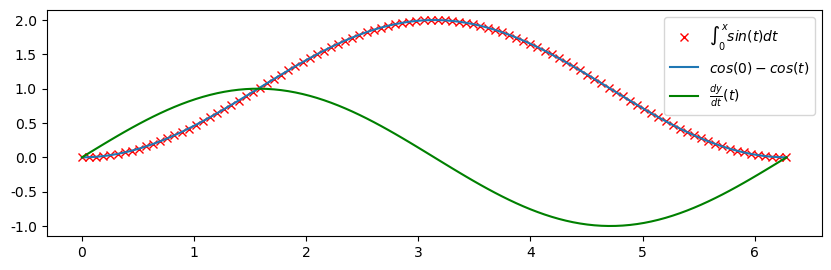

In [21]:
fig, ax = plt.subplots(figsize=(10,3), dpi=100)
ax.plot(t, result, 'rx', label='$\int_{0}^{x}sin(t) dt$')
ax.plot(t, -cos(t) + cos(0), label='$cos(0) - cos(t)$')
ax.plot(t, dy_dt(0, t), 'g-', label=r'$ \frac{dy}{dt} (t)$')
ax.legend(loc='best')

### 高阶微分方程

抛物运动（竖直方向）：

$$
\frac{d^2x}{dt^2} = g - \frac{D}{m}\frac{dx}{dt}
$$

改写成如下形式：

$$y = \left[x, \frac{dx}{dt}\right] $$

$$\begin{aligned}
\frac{dy_0}{dt} &= y_1 \\\
\frac{dy_1}{dt} &= -g - \frac{D}{m} y_1 \\\
\end{aligned}
$$

In [23]:
def dy_dt(y, t):
    """Governing equations for projectile motion with drag.
    y[0] = position
    y[1] = velocity
    g = gravity (m/s2)
    D = drag (1/s) = force/velocity
    m = mass (kg)
    """
    g = -9.8
    D = 0.1
    m = 0.15
    dy1 = g - (D/m) * y[1]
    dy0 = y[1] if y[0] >= 0 else 0.
    return [dy0, dy1]

In [25]:
position_0 = 0.
velocity_0 = 100
t = np.linspace(0, 12, 100)
y = odeint(dy_dt, [position_0, velocity_0], t)

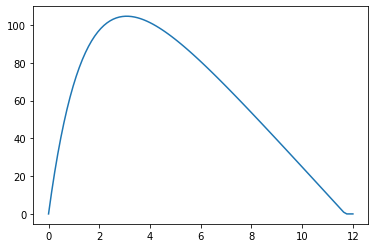

In [26]:
plt.plot(t, y[:,0])

In [28]:
y, infodict = odeint(dy_dt, [position_0, velocity_0], t, full_output=True, printmessg=True, )
print(sorted(infodict.keys()))
print("cumulative number of function evaluations at each calculated point:", infodict['nfe'])
print("cumulative number of time steps", infodict['nst'])

['hu', 'imxer', 'leniw', 'lenrw', 'message', 'mused', 'nfe', 'nje', 'nqu', 'nst', 'tcur', 'tolsf', 'tsw']
cumulative number of function evaluations at each calculated point: [ 45  49  51  53  55  59  61  61  63  65  67  67  69  71  73  73  75  77
  77  79  79  81  81  83  85  85  87  87  89  89  91  91  93  95  95  97
  97  99  99 101 101 103 103 105 107 107 109 109 111 111 113 113 115 115
 117 117 119 119 121 121 123 123 123 125 125 127 127 129 129 131 131 131
 133 133 135 135 135 137 137 139 139 139 141 141 143 143 143 145 145 147
 147 149 149 149 154 158 274 280 280]
cumulative number of time steps [ 20  22  23  24  25  27  28  28  29  30  31  31  32  33  34  34  35  36
  36  37  37  38  38  39  40  40  41  41  42  42  43  43  44  45  45  46
  46  47  47  48  48  49  49  50  51  51  52  52  53  53  54  54  55  55
  56  56  57  57  58  58  59  59  59  60  60  61  61  62  62  63  63  63
  64  64  65  65  65  66  66  67  67  67  68  68  69  69  69  70  70  71
  71  72  72  72  73  75 1

/opt/miniconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:250: ODEintWarning: Integration successful.
  warnings.warn(warning_msg, ODEintWarning)
